### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

# ________________________________________________________________

## Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Importing Dataset

In [50]:
data=pd.read_csv("C:\\Users\HP\Desktop\Glass_Identification.csv")
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [51]:
data.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

## Renaming the column names for better understanding

In [52]:
new_column_names = {
    '1': 'Id',
    '1.52101': 'Refractive_Index',
    '13.64': 'Sodium',
    '4.49': 'Magnesium',
    '1.10': 'Aluminum',
    '71.78': 'Silicon',
    '0.06': 'Potassium',
    '8.75': 'Calcium',
    '0.00': 'Barium',
    '0.00.1': 'Iron',
    '1.1': 'Type_of_glass'}

data.rename(columns=new_column_names, inplace=True)

print(data.columns)

Index(['Id', 'Refractive_Index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')


In [53]:
data.head(10)


,Id,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [54]:
data.sample(10)

,Id,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
132,134,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
193,195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
189,191,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
168,170,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
61,63,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1
45,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
201,203,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
186,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
100,102,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00,2
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1


In [55]:
data.shape

(213, 11)

In [56]:
data.drop('Id', axis=1, inplace=True)

In [57]:
data.dtypes

Refractive_Index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

#### All Columns have numerical value

## Checking null Values

<Axes: >

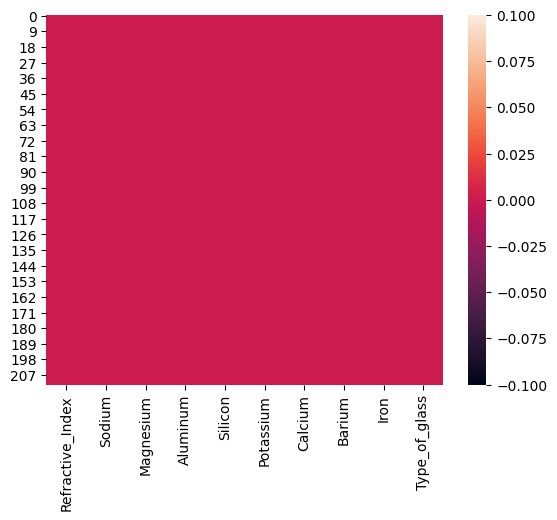

In [58]:
sns.heatmap(data.isnull())   #plotting missing values in heatmap is there is present

In [59]:
data.isnull().sum().sum()

0

#### There is no any null vlaue present in dataset

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_Index  213 non-null    float64
 1   Sodium            213 non-null    float64
 2   Magnesium         213 non-null    float64
 3   Aluminum          213 non-null    float64
 4   Silicon           213 non-null    float64
 5   Potassium         213 non-null    float64
 6   Calcium           213 non-null    float64
 7   Barium            213 non-null    float64
 8   Iron              213 non-null    float64
 9   Type_of_glass     213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Data Visualaization and Analysis

In [61]:
data.describe()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


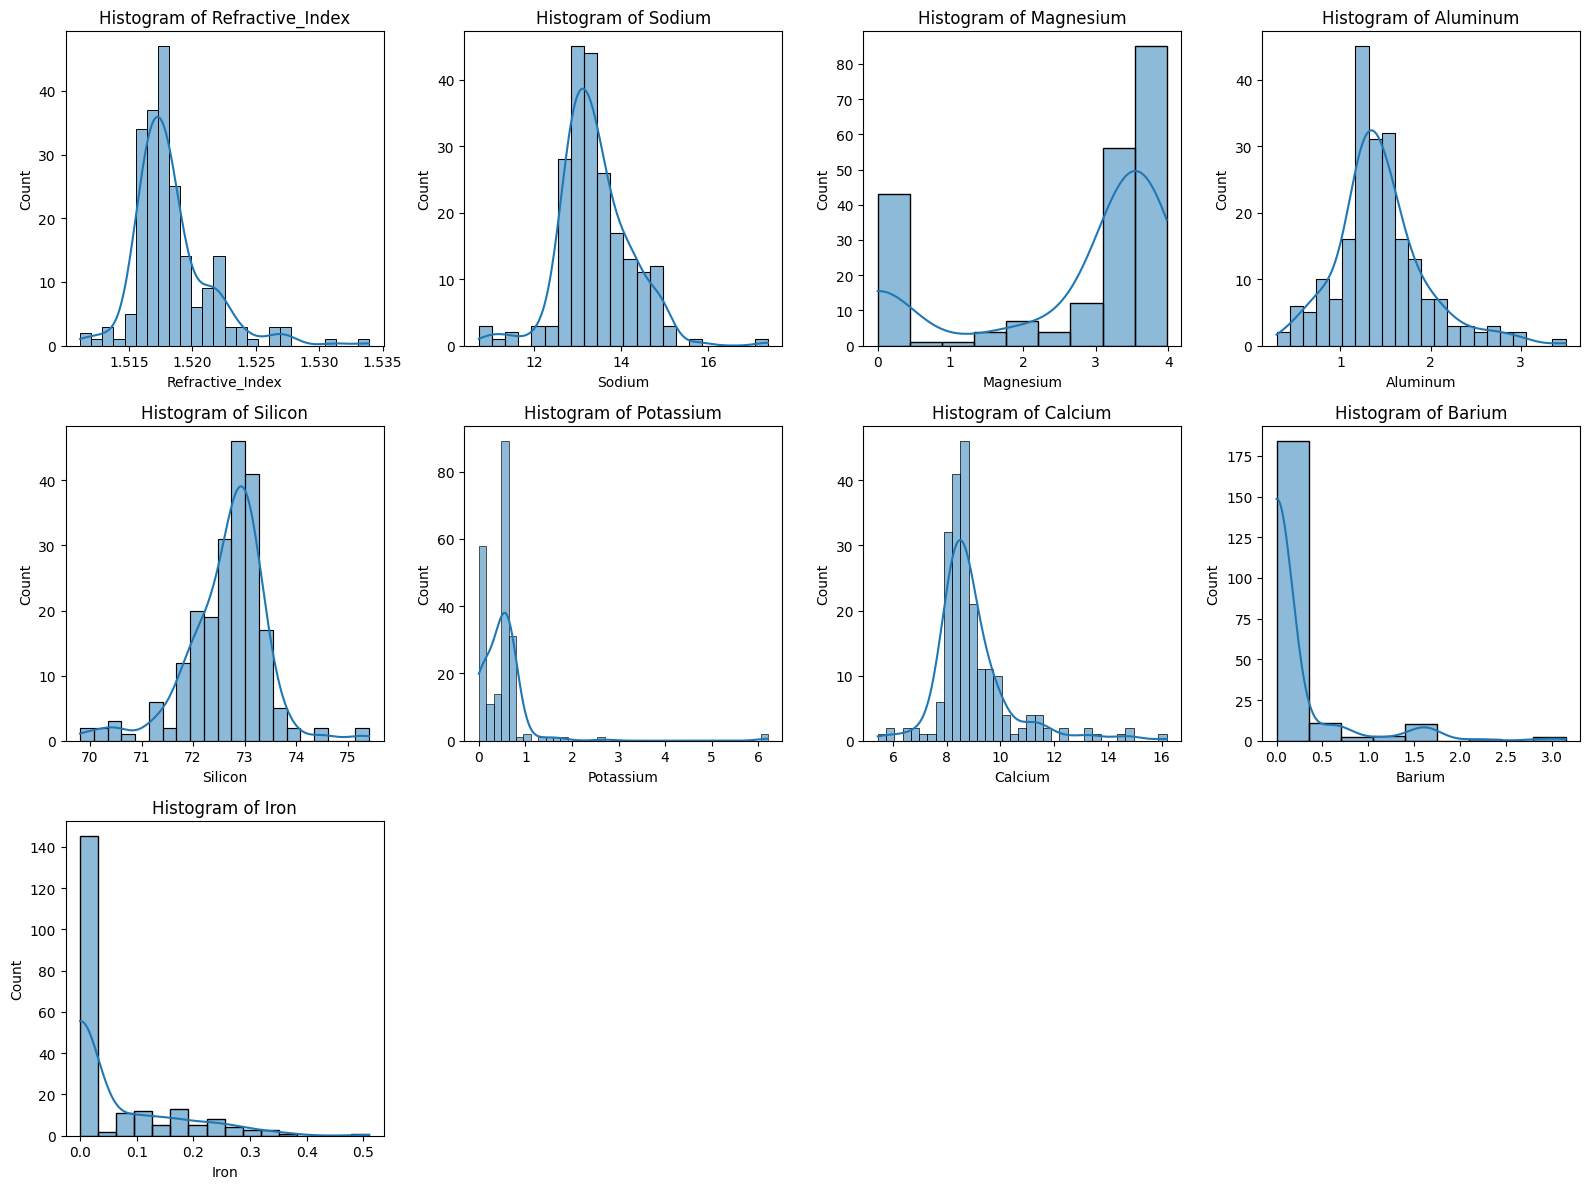

In [62]:
selected_attributes = ['Refractive_Index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']

# Plot histograms for selected numerical attributes
plt.figure(figsize=(16, 12))
for i, attribute in enumerate(selected_attributes, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[attribute], kde=True)
    plt.title(f'Histogram of {attribute}')
plt.tight_layout()
plt.show()

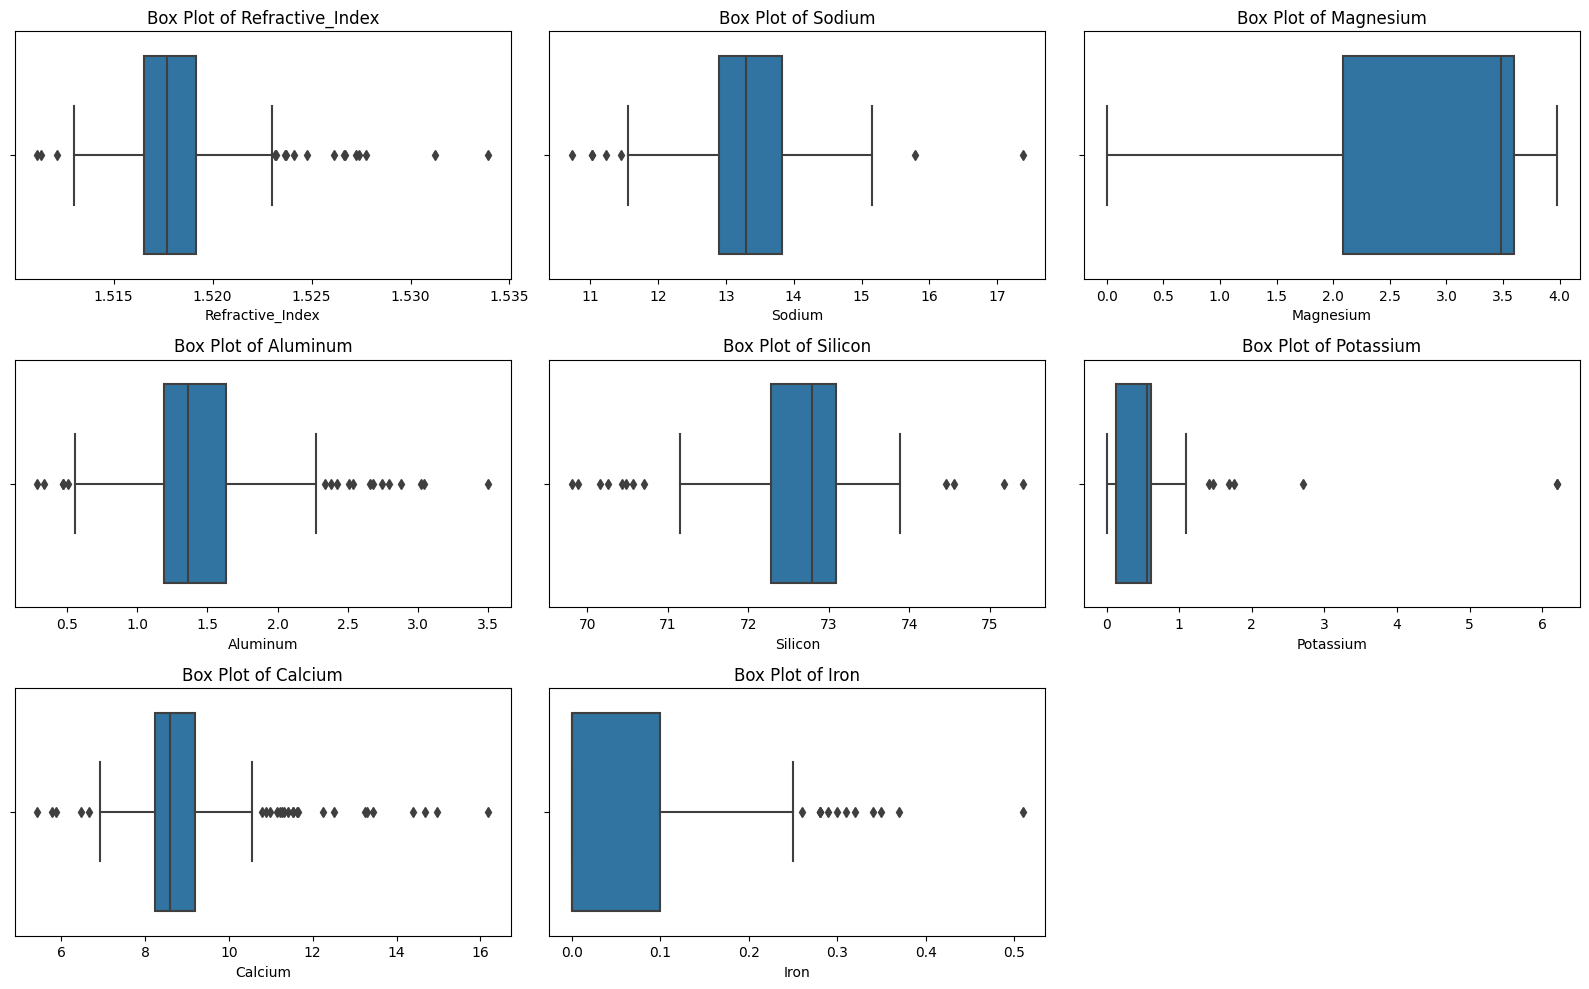

In [63]:
columns = ['Refractive_Index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Iron']

# Create box plots for numerical columns to identify outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

There are outliers in some columns so we treat them using IQR method

In [65]:
# Define a function to treat outliers using the IQR method
def treat_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

for column in columns:
    treat_outliers_iqr(data, column)

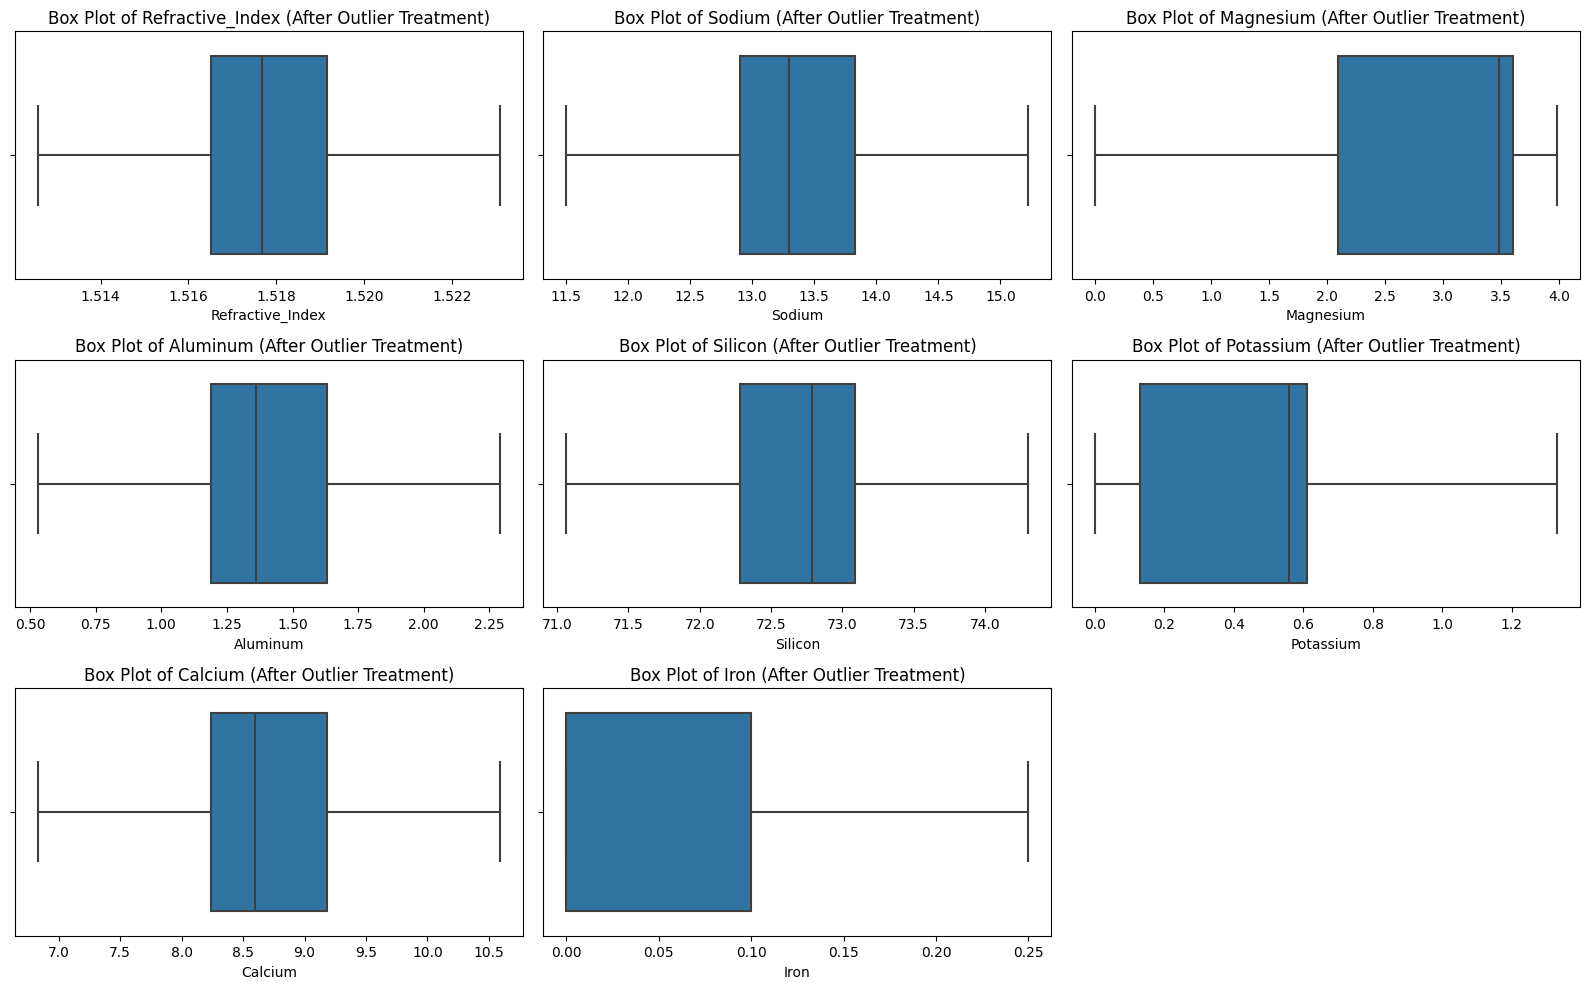

In [66]:
# Create box plots after treating outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col} (After Outlier Treatment)')
plt.tight_layout()
plt.show()

#### All outliers Treated

In [67]:
data.columns

Index(['Refractive_Index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

In [68]:
# Compute the correlation matrix
data.corr()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
Refractive_Index,1.000000,-0.067369,-0.039739,-0.468502,-0.528308,-0.340086,0.763100,-0.068692,0.098511,-0.164865
Sodium,-0.067369,1.000000,-0.296399,0.209396,-0.162601,-0.494098,-0.105277,0.379133,-0.250672,0.525092
Magnesium,-0.039739,-0.296399,1.000000,-0.472427,-0.204066,0.338778,-0.373236,-0.492149,0.105975,-0.744004
Aluminum,-0.468502,0.209396,-0.472427,1.000000,0.138173,0.178840,-0.281585,0.479381,-0.091765,0.604184
Silicon,-0.528308,-0.162601,-0.204066,0.138173,1.000000,-0.041752,-0.192748,-0.023095,-0.068541,0.176478
Potassium,-0.340086,-0.494098,0.338778,0.178840,-0.041752,1.000000,-0.500226,-0.081067,0.076112,-0.253625
Calcium,0.763100,-0.105277,-0.373236,-0.281585,-0.192748,-0.500226,1.000000,-0.140896,0.103133,0.044942
Barium,-0.068692,0.379133,-0.492149,0.479381,-0.023095,-0.081067,-0.140896,1.000000,-0.068063,0.574896
Iron,0.098511,-0.250672,0.105975,-0.091765,-0.068541,0.076112,0.103133,-0.068063,1.000000,-0.222014
Type_of_glass,-0.164865,0.525092,-0.744004,0.604184,0.176478,-0.253625,0.044942,0.574896,-0.222014,1.000000


In [69]:
data.isnull().sum().sum()

0

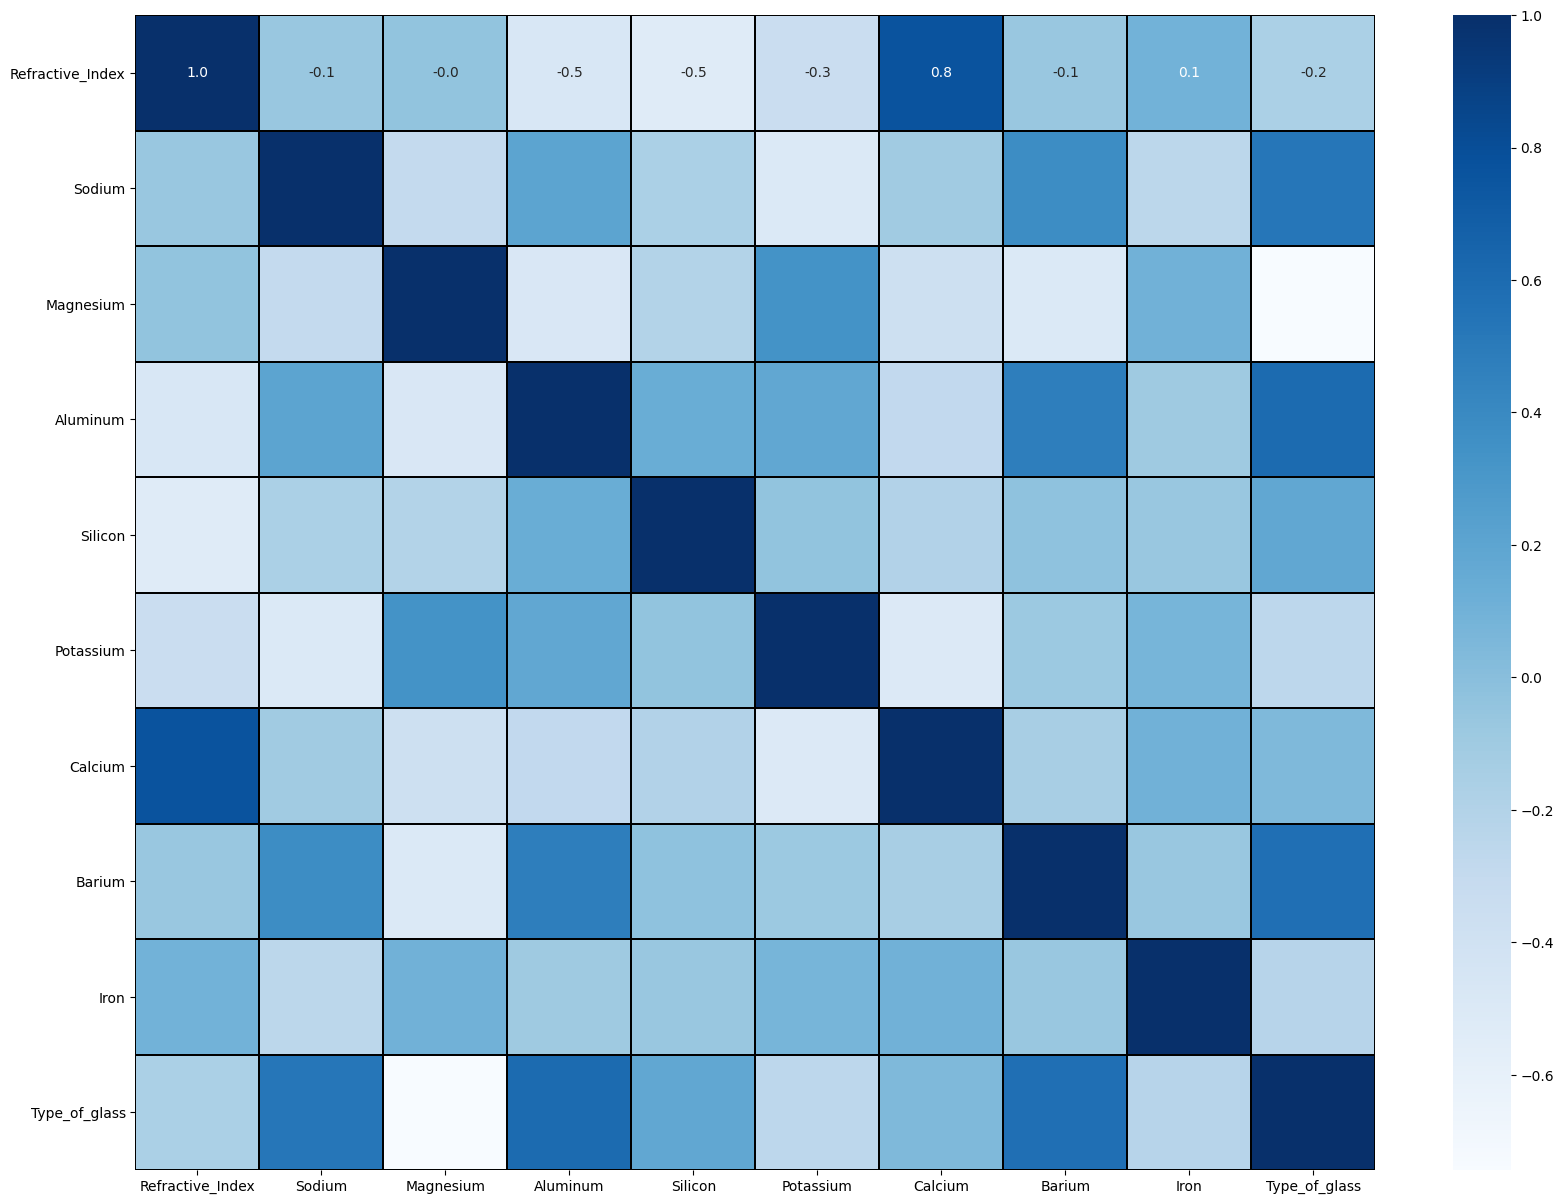

In [70]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()

## Data Preprocessing

### Seprating features and label

In [71]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [73]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (149, 9)
y_train shape: (149,)
x_test shape: (64, 9)
y_test.shape: (64,)


## Checking accuracy for RandomForestClassifier

In [74]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'}
Test Accuracy: 0.75


In [75]:
RFC = RandomForestClassifier(n_estimators=40,criterion='entropy',max_depth= 15)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predRFC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predRFC))
print("")
print("Classification Report:\n", classification_report(y_test, predRFC))

Accuracy: 0.71875

Confusion Matrix:
 [[20  4  0  0  0  0]
 [ 4 18  0  1  0  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 1  1  0  0  0  4]]

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.83      0.78        24
           2       0.64      0.78      0.71        23
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       1.00      0.75      0.86         4
           7       1.00      0.67      0.80         6

    accuracy                           0.72        64
   macro avg       0.65      0.59      0.61        64
weighted avg       0.68      0.72      0.69        64



## MultinomialNB

In [76]:
MNB=MultinomialNB(class_prior=None)
MNB.fit(x_train,y_train)
pred_MNB=MNB.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_MNB))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_MNB))
print("")
print("Classification Report:\n", classification_report(y_test, pred_MNB))

Accuracy: 0.40625

Confusion Matrix:
 [[ 4 20  0  0  0  0]
 [ 3 19  0  0  0  1]
 [ 1  4  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 0  2  0  0  0  2]
 [ 0  2  0  1  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.17      0.25        24
           2       0.40      0.83      0.54        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.43      0.50      0.46         6

    accuracy                           0.41        64
   macro avg       0.22      0.25      0.21        64
weighted avg       0.37      0.41      0.33        64



## K Neighbors Classification

In [77]:
knn=KNeighborsClassifier(metric_params=None)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("")
print("Classification Report:\n", classification_report(y_test, pred_knn))

Accuracy: 0.546875

Confusion Matrix:
 [[16  6  2  0  0  0]
 [ 6 14  1  0  2  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  1  1]
 [ 1  1  0  1  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.67      0.64        24
           2       0.54      0.61      0.57        23
           3       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         2
           6       0.33      0.25      0.29         4
           7       0.75      0.50      0.60         6

    accuracy                           0.55        64
   macro avg       0.41      0.37      0.39        64
weighted avg       0.53      0.55      0.54        64



## Support vector classifier

In [78]:
param_dist = {
    'C': randint(1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_classifier = SVC()
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(x_train, y_train)

best_params, best_estimator = random_search.best_params_, random_search.best_estimator_
y_pred = best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 22, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.65625


##### rbf

In [79]:
svc_rbf=SVC(kernel='rbf',gamma='auto',C=22)
svc_rbf.fit(x_train,y_train)
predsvc_rbf=svc_rbf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_rbf))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_rbf))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_rbf))

Accuracy: 0.65625

Confusion Matrix:
 [[20  4  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 4  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  2  0]
 [ 1  1  0  1  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.83      0.71        24
           2       0.65      0.65      0.65        23
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.67      0.50      0.57         4
           7       1.00      0.50      0.67         6

    accuracy                           0.66        64
   macro avg       0.60      0.58      0.57        64
weighted avg       0.62      0.66      0.63        64



## DecisionTreeClassifier

In [80]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.671875


In [81]:
dtc=DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_test, pred_dtc))

Accuracy: 0.625

Confusion Matrix:
 [[20  3  1  0  0  0]
 [10 12  0  1  0  0]
 [ 1  1  3  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  2  0]
 [ 0  2  0  1  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.83      0.73        24
           2       0.55      0.52      0.53        23
           3       0.75      0.60      0.67         5
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         4
           7       1.00      0.50      0.67         6

    accuracy                           0.62        64
   macro avg       0.66      0.49      0.54        64
weighted avg       0.65      0.62      0.62        64



## ExtraTreesClassifier

In [82]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.75


In [83]:
EXC=ExtraTreesClassifier(n_estimators=42,criterion='gini')
EXC.fit(x_train,y_train)
pred_EXC=RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_EXC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_EXC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_EXC))

Accuracy: 0.71875

Confusion Matrix:
 [[20  4  0  0  0  0]
 [ 4 18  0  1  0  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 1  1  0  0  0  4]]

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.83      0.78        24
           2       0.64      0.78      0.71        23
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         2
           6       1.00      0.75      0.86         4
           7       1.00      0.67      0.80         6

    accuracy                           0.72        64
   macro avg       0.65      0.59      0.61        64
weighted avg       0.68      0.72      0.69        64



## GradientBoostingClassifier

In [84]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4}
Test Accuracy: 0.71875


In [85]:
GBC=GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,max_depth=4)
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_GBC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_GBC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_GBC))

Accuracy: 0.71875

Confusion Matrix:
 [[21  3  0  0  0  0]
 [ 6 17  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 1  0  0  2  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.88      0.76        24
           2       0.74      0.74      0.74        23
           3       0.00      0.00      0.00         5
           5       0.50      1.00      0.67         2
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         6

    accuracy                           0.72        64
   macro avg       0.65      0.64      0.62        64
weighted avg       0.69      0.72      0.69        64



## AdaBoostClassifier

In [86]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
Test Accuracy: 0.59375


In [87]:
ABC=AdaBoostClassifier(n_estimators=100,learning_rate=.5)
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ABC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ABC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ABC))

Accuracy: 0.59375

Confusion Matrix:
 [[21  2  1  0  0  0]
 [14  9  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  4  0]
 [ 1  1  0  0  0  4]]

Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.88      0.66        24
           2       0.60      0.39      0.47        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         6

    accuracy                           0.59        64
   macro avg       0.52      0.49      0.49        64
weighted avg       0.57      0.59      0.55        64



## BaggingClassifier

In [88]:
param_combinations = [
    {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0},
    {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.8},
    {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    bagging_classifier = BaggingClassifier(**params, random_state=42)
    bagging_classifier.fit(x_train, y_train)
    y_pred = bagging_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0}
Test Accuracy: 0.71875


In [89]:
BC=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0)
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_BC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_BC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_BC))

Accuracy: 0.6875

Confusion Matrix:
 [[20  4  0  0  0  0]
 [ 7 15  0  1  0  0]
 [ 1  2  2  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 1  1  0  1  0  3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.83      0.75        24
           2       0.62      0.65      0.64        23
           3       1.00      0.40      0.57         5
           5       0.33      0.50      0.40         2
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         6

    accuracy                           0.69        64
   macro avg       0.77      0.61      0.65        64
weighted avg       0.73      0.69      0.69        64



# RandomForestClassifier gives better prediction

## Cross Validation Score¶

In [90]:
# Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.69767442 0.76744186 0.6744186  0.54761905 0.76190476]
0.689811738648948
0.02893826135105204


## Saving the model

In [91]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'Glass_Classification')

['Glass_Classification']

In [92]:
model=joblib.load(open("Glass_Classification","rb"))

In [93]:
data.head()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.25,1


In [94]:
test = (1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00) #taking data from 4th row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print(pred)

[1]


# Model gives accurate prediction